# **Chicago Speeding Traffic Cameras**

The data set I am using is the Chicago Red Light and Speed Camera Data. The dataset reflects the daily volume of violations that have occurred in Children's Safety Zones for each camera. Here is the link to the dataset https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data#speed-camera-violations.csv

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# Load in data frames
df = pd.read_csv('speed camera violations.csv')
# This dataframe has first date that camera came on line
locations = pd.read_csv('speed camera locations.csv')

# Change the column labels to lowercase and replace spaces with underscores
# Change date column datatype to datetime
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df['violation_date'] = pd.to_datetime(df['violation_date'])
df.drop(columns=['x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'location','historical_wards_2003-2015','zip_codes','community_areas','census_tracts','wards'], inplace=True)
df.head()

,address,camera_id,violation_date,violations
0,10318 S INDIANAPOLIS,CHI120,2019-06-15,4
1,1111 N HUMBOLDT,CHI010,2019-06-15,24
2,1142 W IRVING PARK,CHI095,2019-06-15,40
3,115 N OGDEN,CHI077,2019-06-15,11
4,1315 W GARFIELD BLVD,CHI121,2019-06-15,22


In [32]:
# Format the locations columns
locations.columns = locations.columns.str.lower()
locations.columns = locations.columns.str.replace(' ', '_')
locations['go-live_date'] = pd.to_datetime(locations['go-live_date'])
print(locations.head())

                                   address first_approach second_approach  \
0        5454 W Irving Park (Speed Camera)             EB              WB   
1            3534 N Western (Speed Camera)             SB             NaN   
2        8345 S Ashland Ave (Speed Camera)             NB             NaN   
3  7122 S South Chicago Ave (Speed Camera)            SEB             NaN   
4          732 N Pulaski Rd (Speed Camera)             NB              SB   

  go-live_date   latitude  longitude  \
0   2013-11-10  41.953330 -87.764267   
1   2014-01-31  41.945963 -87.688384   
2   2014-10-11  41.741742 -87.663073   
3   2018-08-20  41.765164 -87.604804   
4   2014-03-24  41.894503 -87.726205   

                                            location  \
0  {'human_address': '{"address": "", "city": "",...   
1  {'human_address': '{"address": "", "city": "",...   
2  {'human_address': '{"address": "", "city": "",...   
3  {'human_address': '{"address": "", "city": "",...   
4  {'human_addre

In [33]:
# Split out the location address into two columns and remove the extra one
locations['address1'], locations['address2'] = locations['address'].str.split(' \(', 1).str
locations.drop(columns=['first_approach', 'second_approach', 'address', 'address2', 'location'], inplace=True)
print(locations.head())

  go-live_date   latitude  longitude  historical_wards_2003-2015  zip_codes  \
0   2013-11-10  41.953330 -87.764267                          25      22618   
1   2014-01-31  41.945963 -87.688384                          13      21538   
2   2014-10-11  41.741742 -87.663073                          18      21554   
3   2018-08-20  41.765164 -87.604804                          32      21546   
4   2014-03-24  41.894503 -87.726205                          11      21572   

   community_areas  census_tracts  wards                  address1  
0               15            260     19        5454 W Irving Park  
1               46            110     18            3534 N Western  
2               70            531     13        8345 S Ashland Ave  
3               67            121     33  7122 S South Chicago Ave  
4               24             99     45          732 N Pulaski Rd  


In [34]:
# convert both address columns to lowercase before merging
df['address'] = df['address'].str.lower()
locations['address1'] = locations['address1'].str.lower()

# Merge locations into the dataframe
df = pd.merge(df, locations, left_on='address', right_on='address1', how='left')

# The day of the week with Monday=0, Sunday=6
df['violation_wkday'] = df['violation_date'].dt.dayofweek

# Frop the extra address columns
df.drop(columns=['address1'], inplace=True)
print(df.head())

                address camera_id violation_date  violations go-live_date  \
0  10318 s indianapolis    CHI120     2019-06-15           4   2013-12-24   
1       1111 n humboldt    CHI010     2019-06-15          24          NaT   
2    1142 w irving park    CHI095     2019-06-15          40   2013-12-06   
3           115 n ogden    CHI077     2019-06-15          11   2014-01-25   
4  1315 w garfield blvd    CHI121     2019-06-15          22   2014-03-24   

    latitude  longitude  historical_wards_2003-2015  zip_codes  \
0  41.707577 -87.529848                        47.0    21202.0   
1        NaN        NaN                         NaN        NaN   
2  41.954541 -87.658573                        37.0    21186.0   
3  41.883192 -87.664115                        41.0    14917.0   
4  41.793645 -87.657861                        19.0    22257.0   

   community_areas  census_tracts  wards  violation_wkday  
0             49.0          705.0   47.0                5  
1              NaN  

In [35]:
# Check what non-null values are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191403 entries, 0 to 191402
Data columns (total 13 columns):
address                       191403 non-null object
camera_id                     191403 non-null object
violation_date                191403 non-null datetime64[ns]
violations                    191403 non-null int64
go-live_date                  135248 non-null datetime64[ns]
latitude                      135248 non-null float64
longitude                     135248 non-null float64
historical_wards_2003-2015    135248 non-null float64
zip_codes                     135248 non-null float64
community_areas               135248 non-null float64
census_tracts                 135248 non-null float64
wards                         135248 non-null float64
violation_wkday               191403 non-null int64
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 20.4+ MB


In [36]:
# How many unique addresses are there
df['address'] = df['address'].str.lower()
df['address'].value_counts().head()

5520 s western           1806
3646 w madison           1805
536 e morgan dr          1805
6226 w irving park rd    1804
1315 w garfield blvd     1803
Name: address, dtype: int64

In [37]:
# How many unique camera id's are there
# Same number as unique addresses, I'll use camera id's
df['camera_id'].value_counts().head()

CHI069    1806
CHI009    1805
CHI029    1805
CHI083    1804
CHI121    1803
Name: camera_id, dtype: int64

In [39]:
# Cameras were implemented on different dates, let's limit this to the latest year
# Also make sure that the cameras all came online before this current year
df_2018 = df[(df['violation_date'] >= '2018-01-01') & (df['go-live_date'] <= '2018-01-01')]

In [40]:
# See how many violations there are per camera
camera_group = df_2018.groupby(by='camera_id').violations.sum().reset_index()

# How many violations in 2018 were found at the top 10 worst locations for speeding
# Looking at the variability in number of speeding violations at cameras
top10_cameras = camera_group.sort_values('violations', ascending=False).head(10)
print(top10_cameras)

   camera_id  violations
88    CHI149       57853
8     CHI029       51324
65    CHI120       49958
0     CHI003       47127
40    CHI079       44945
24    CHI058       34379
49    CHI095       32706
84    CHI144       28953
87    CHI147       26290
1     CHI019       22197


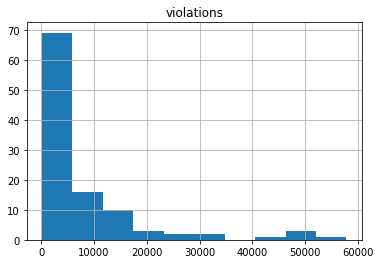

In [41]:
# Graph showing number of violations at each camera in 2018
camera_group.hist('violations', bins=10)
plt.show()

Most cameras less than 20,000 violations over the time period.

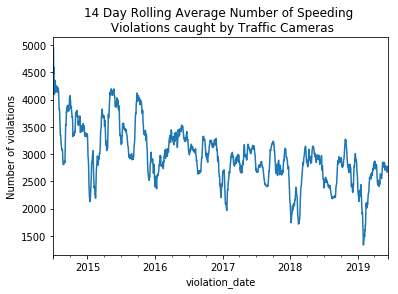

In [42]:
# Show how speeding violations at cameras has cnaged over time
all_dates = df.groupby('violation_date').violations.sum()
all_dates_roll = all_dates.rolling('14d').mean()
all_dates_roll.plot()
plt.title('14 Day Rolling Average Number of Speeding \n Violations caught by Traffic Cameras')
plt.ylabel('Number of violations')
plt.show()

We can see that there appear to be fewer traffic violations in winter. It also appears that the overall trend has been for fewer traffic violations over time. This means that any comparison we do should be comparing against current camera violations, and not necessarily to past data.

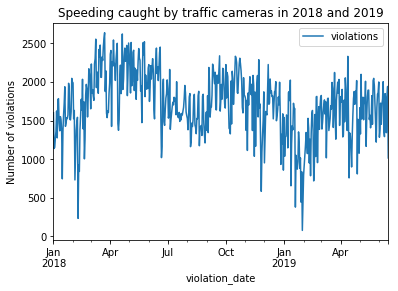

In [44]:
# Looking just at 2018 data
date_group = df_2018.groupby('violation_date').violations.sum().reset_index()
date_group['violation_wkday'] = date_group['violation_date'].dt.dayofweek

date_group.plot('violation_date', 'violations')
plt.title('Speeding caught by traffic cameras in 2018 and 2019')
plt.ylabel('Number of violations')
plt.show()

[]

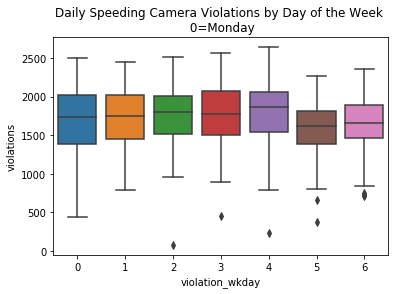

In [45]:
# How does it vary by day of the week
ax = sns.boxplot(x='violation_wkday', y='violations', data=date_group)
plt.title('Daily Speeding Camera Violations by Day of the Week \n 0=Monday')
plt.plot()

Looks like there is some variation by day of the week as well.

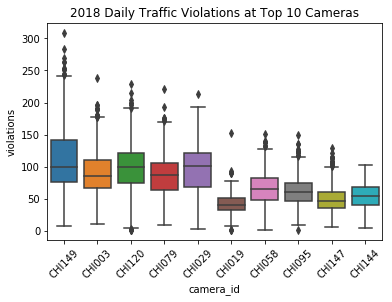

In [46]:
df_2018_top10 = df_2018[df_2018.camera_id.isin(top10_cameras.camera_id)].sort_values('violations', ascending=False)
ax = sns.boxplot(x='camera_id', y='violations', data=df_2018_top10)
plt.xticks(rotation=45)
plt.title('2018 Daily Traffic Violations at Top 10 Cameras')
plt.show()

Definitely variation by camera.

# **The Problem**

How to decrease the number of speeding traffic violations in Chicago? Speeding creates unsafe streets, and makes it hard for drivers to see pedestrians in time to stop.

# **The Potential Solution**

Adding a neon pink sign warning about the presence of traffic cameras will decrease speeding.

# **Method of Testing the Solution**

Install neon pink traffic camera warning signs in front of half of the traffic cameras. This is an A/B manipulation where the signs are installed or not installed. The variable of interest is number of speeding violations in areas with extra notice of speeding cameras and areas without the extra signage.
Over the course of two months, tally the number of speeding violations in the areas with signage and without signage. Start the testing in the summer, since winter months have lower traffic violations. If the rate of speeding violations per week decreases by more than 10% in the areas with extra signage compared to the areas without the extra signage, implement signs at all interesections. If there is a change, but less than 10% reduction in speeding violations, keep the signs up for an additional two months and check again. If after four months of testing the change is still less than a 10% reduction in speeding, remove signs. If it is greater than 10%, implement signs at all locations.

**Additional Considerations for Preventing Bias During Testing:**


***Sampling Bias***

The cameras should be randomnly assigned to the two groups. In addition, the mean number of speeding violations per week and the distributions of the speeding violations should be compared and if they are not similar, the groups should be redistributed.

***Contextual Bias***

Check if any special events are occuring in any geographic region with cameras during the test. For example, a sporting event may bring extra cars to an area that are not usually there. This could affect the results. If there is a special event in the region of some of the cameras, remove those cameras and some equivalent cameras from the other group from the study for the duration of the event.

***Other Measured Variables***


Weather - during extreme weather people tend to drive slower and have fewer speeding violations. Number of accidents at intersections - if there are more accidents at the intersections with signs because people are distracted by them or are suddenly slowing to avoid a fine, the signs should be removed even if the rate of violations has decreased.